In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read csv
emails = pd.read_csv("/content/drive/MyDrive/project4/emails.csv")

In [ ]:
label_counts_train = emails["Prediction"].value_counts()

# Print the counts
print(label_counts_train)

Prediction
0    3672
1    1500
Name: count, dtype: int64


In [ ]:
#prepare train validation test sets
X = emails.drop(columns=["Email No.", "Prediction"])
y = emails[["Prediction"]]

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=42,
                                                  shuffle=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2,
                                                  random_state=42,
                                                  shuffle=True)

In [ ]:
# scale the values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Helper function to create plots
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

report = {}

In [27]:
model = Sequential([
    Dense(128, input_dim=3000, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Generate predicted probabilities on the test set
probabilities = model.predict(X_test)

# Convert probabilities to binary predictions with a threshold of 0.5
y_pred = (probabilities > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch 1/20
104/104 [==============================] - 10s 59ms/step - loss: 0.2759 - accuracy: 0.8806 - val_loss: 0.0816 - val_accuracy: 0.9819
Epoch 2/20
104/104 [==============================] - 1s 9ms/step - loss: 0.0590 - accuracy: 0.9849 - val_loss: 0.0610 - val_accuracy: 0.9843
Epoch 3/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0271 - accuracy: 0.9937 - val_loss: 0.0786 - val_accuracy: 0.9855
Epoch 4/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0164 - accuracy: 0.9958 - val_loss: 0.0691 - val_accuracy: 0.9843
Epoch 5/20
104/104 [==============================] - 4s 35ms/step - loss: 0.0103 - accuracy: 0.9982 - val_loss: 0.0728 - val_accuracy: 0.9867
Epoch 6/20
104/104 [==============================] - 1s 7ms/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0795 - val_accuracy: 0.9831
Epoch 7/20
104/104 [==============================] - 1s 9ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0884 - val_accuracy: 0.9843
E

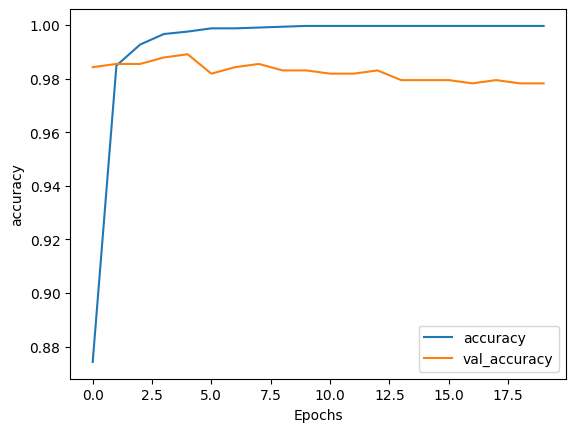

In [ ]:
# Plot accuracy
plot_graphs(history, 'accuracy')



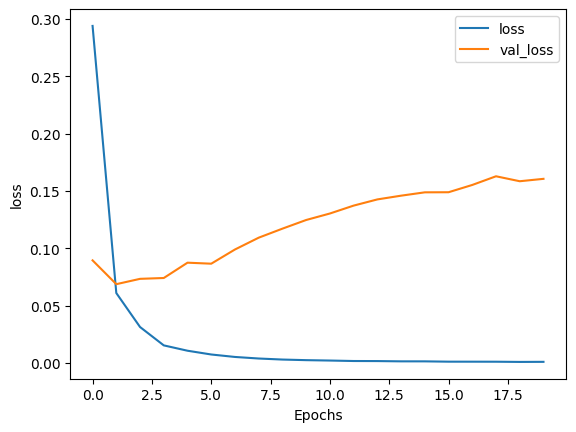

In [ ]:

# Plot loss
plot_graphs(history, 'loss')

In [ ]:
target_names = ["non spam", "spam"]
print(classification_report(np.array(y_test), y_pred, target_names=target_names))


              precision    recall  f1-score   support

    non spam       0.99      0.98      0.99       739
        spam       0.96      0.97      0.96       296

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035

